# Import Necessary Libraries

In [1]:
import os
import gc
import copy

# Load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from scipy import stats

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold ,RepeatedKFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Load plotting libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns

import shap

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls ..

README.md        notebooks        tests
data             requirements.txt wids-venv


# Load the Data

In [3]:
# train_df = pd.read_csv("../input/widsdatathon2022/train.csv")
# test_df = pd.read_csv("../input/widsdatathon2022/test.csv")
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [4]:
# !git branch -a
train_df.shape, test_df.shape

((75757, 64), (9705, 63))

## Exploring Data (EDA) + Data Visualization

In [5]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [8]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

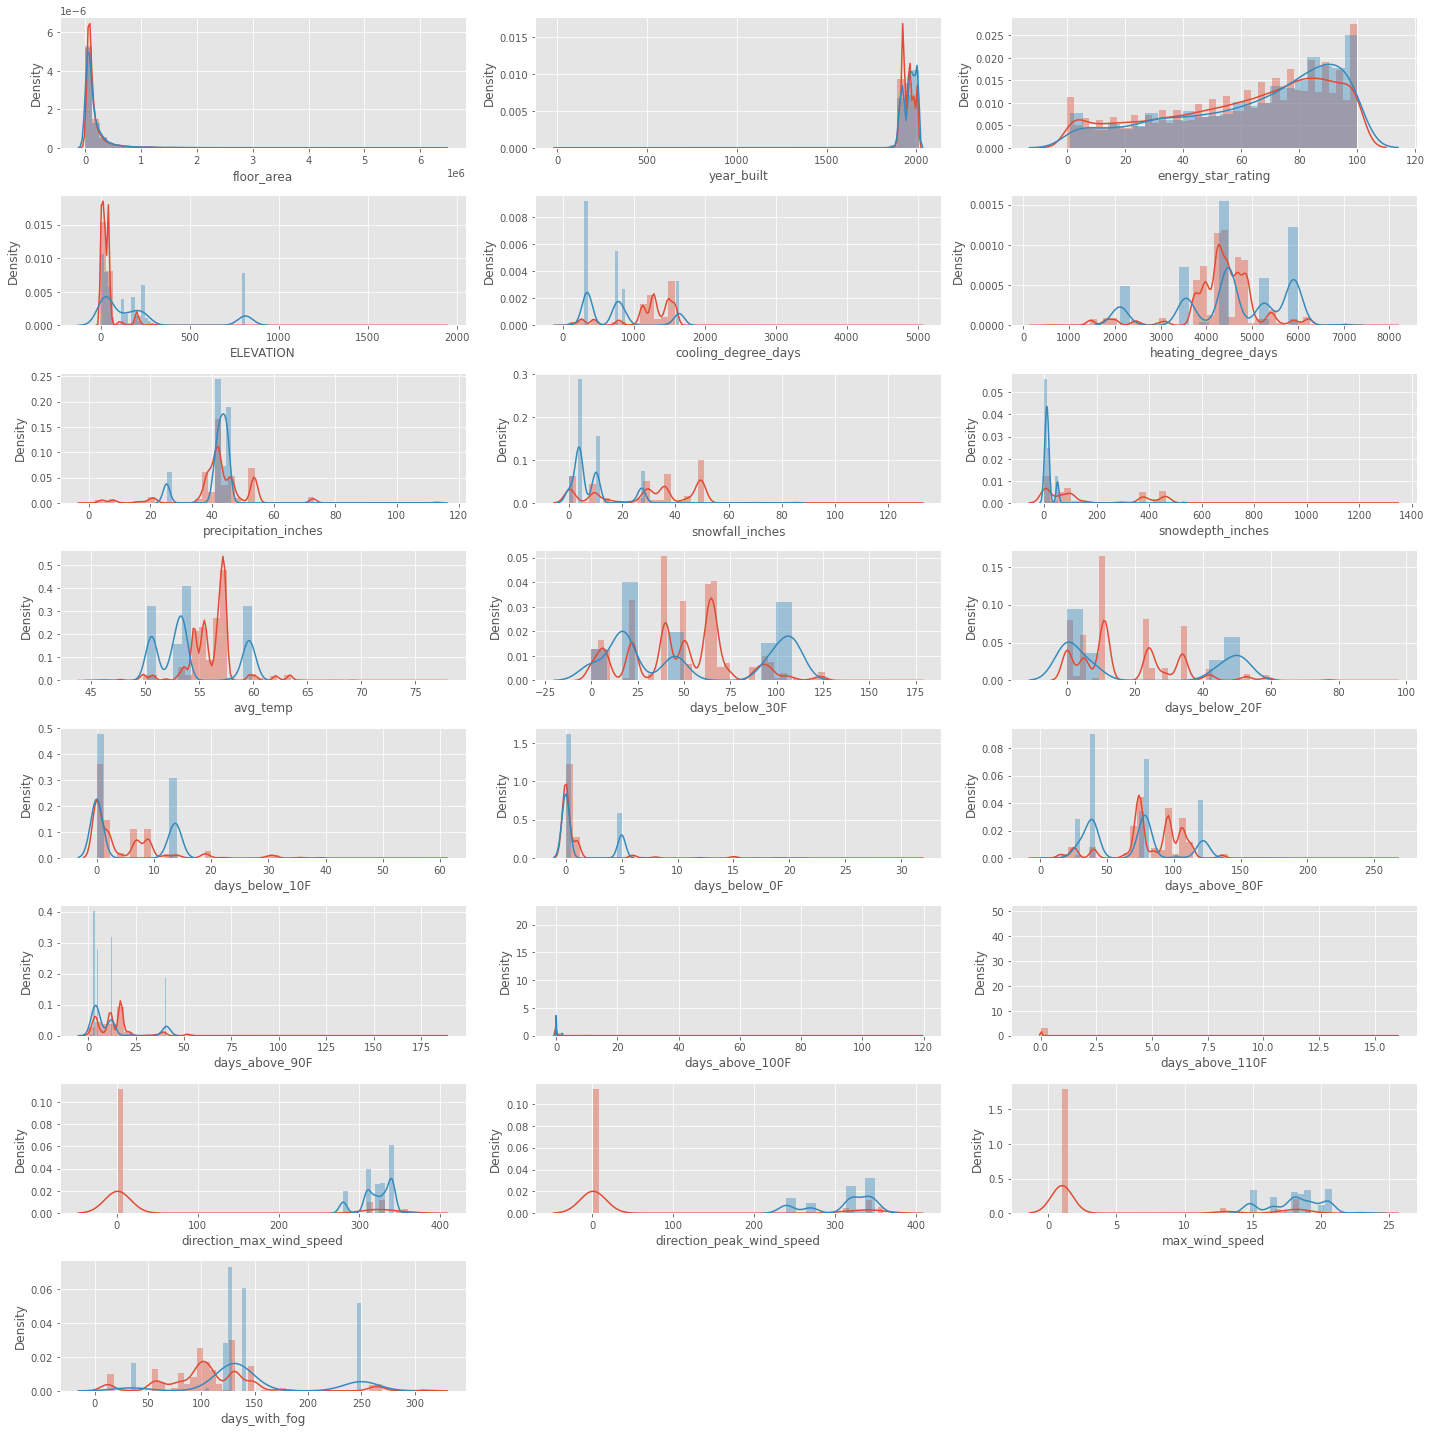

In [10]:
# Looking at the distributions of all numerical variables
plt.figure(figsize=(20,20))

col = ['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'cooling_degree_days','heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F',
       'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

a = 1
for i in range(len(col)):
    plt.subplot(8, 3, a); 
    sns.distplot(train_df[col[i]])
    sns.distplot(test_df[col[i]])
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()

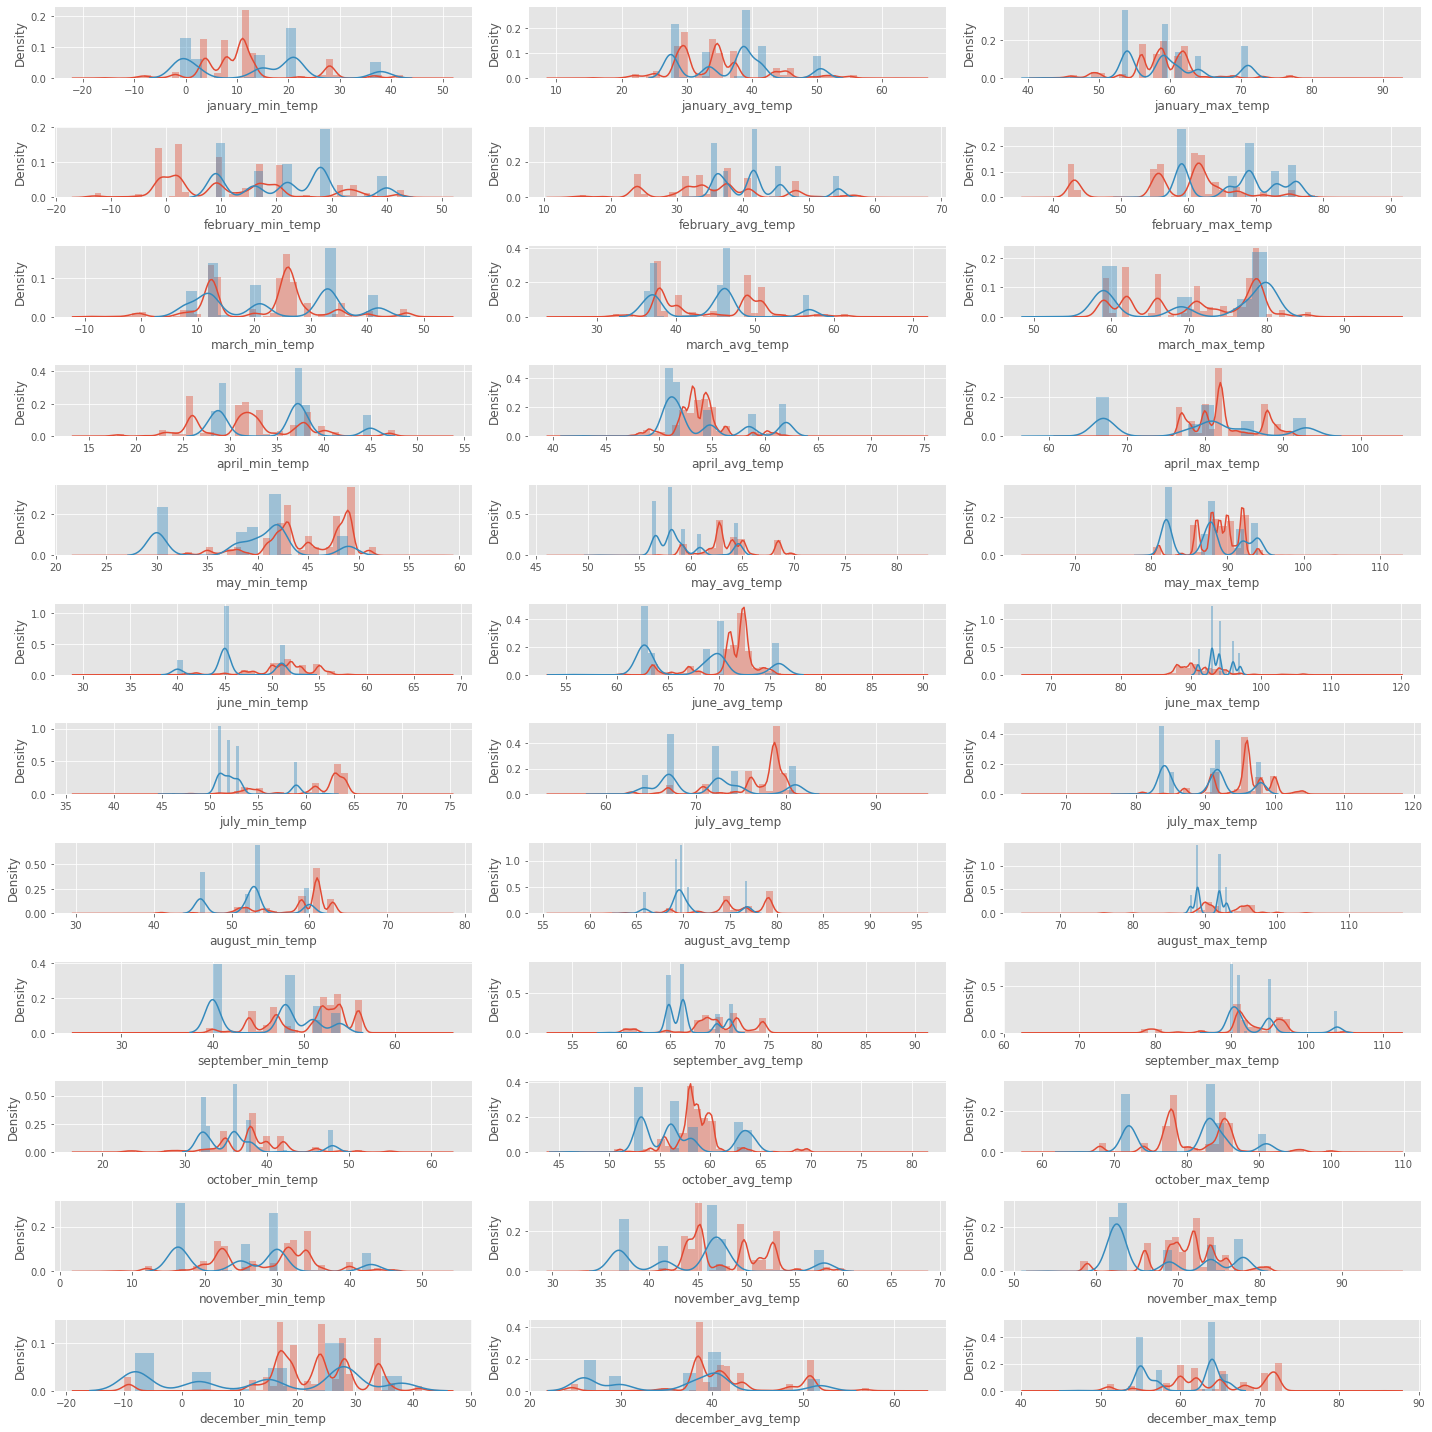

In [11]:
# Looking at the distributions of all temperature variables
plt.figure(figsize=(20,20))

months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", \
          "november", "december"]
temp_cal = ["min", "avg", "max"]
a = 1
for i in range(len(months)):
    for j in temp_cal:
        plt.subplot(12, 3, a); 
        sns.distplot(train_df[months[i]+"_"+ j +"_temp"])
        sns.distplot(test_df[months[i]+"_"+ j +"_temp"])        
        plt.xlabel(months[i]+"_"+ j +"_temp")
        a += 1

plt.tight_layout()

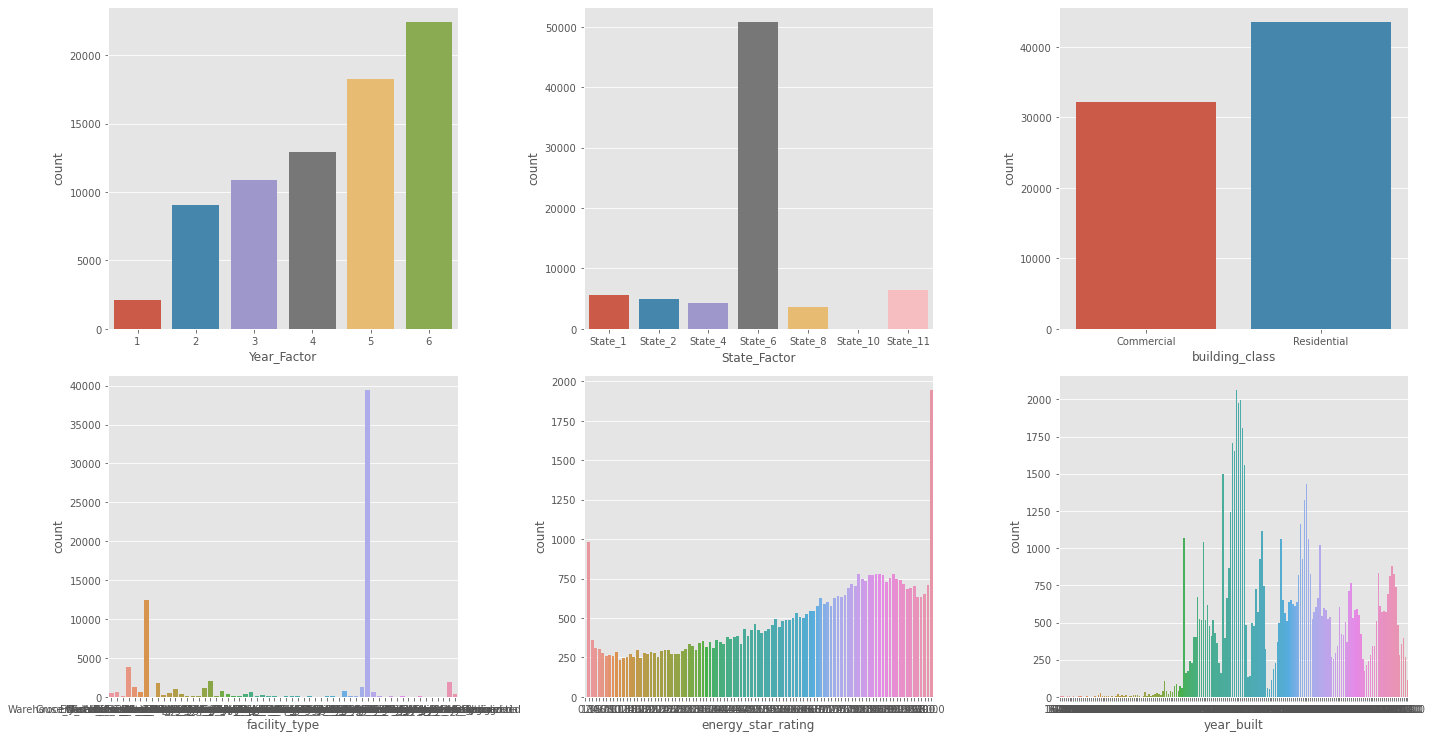

In [12]:
# Looking at the distributions of all discrete variables in train dataset
plt.figure(figsize=(20,15))
discrete = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'energy_star_rating', 'year_built']
a = 1
for i in range(len(discrete)):
    plt.subplot(3, 3, a); 
    sns.countplot(train_df[discrete[i]])
    plt.xlabel(discrete[i])
    a += 1
plt.tight_layout()

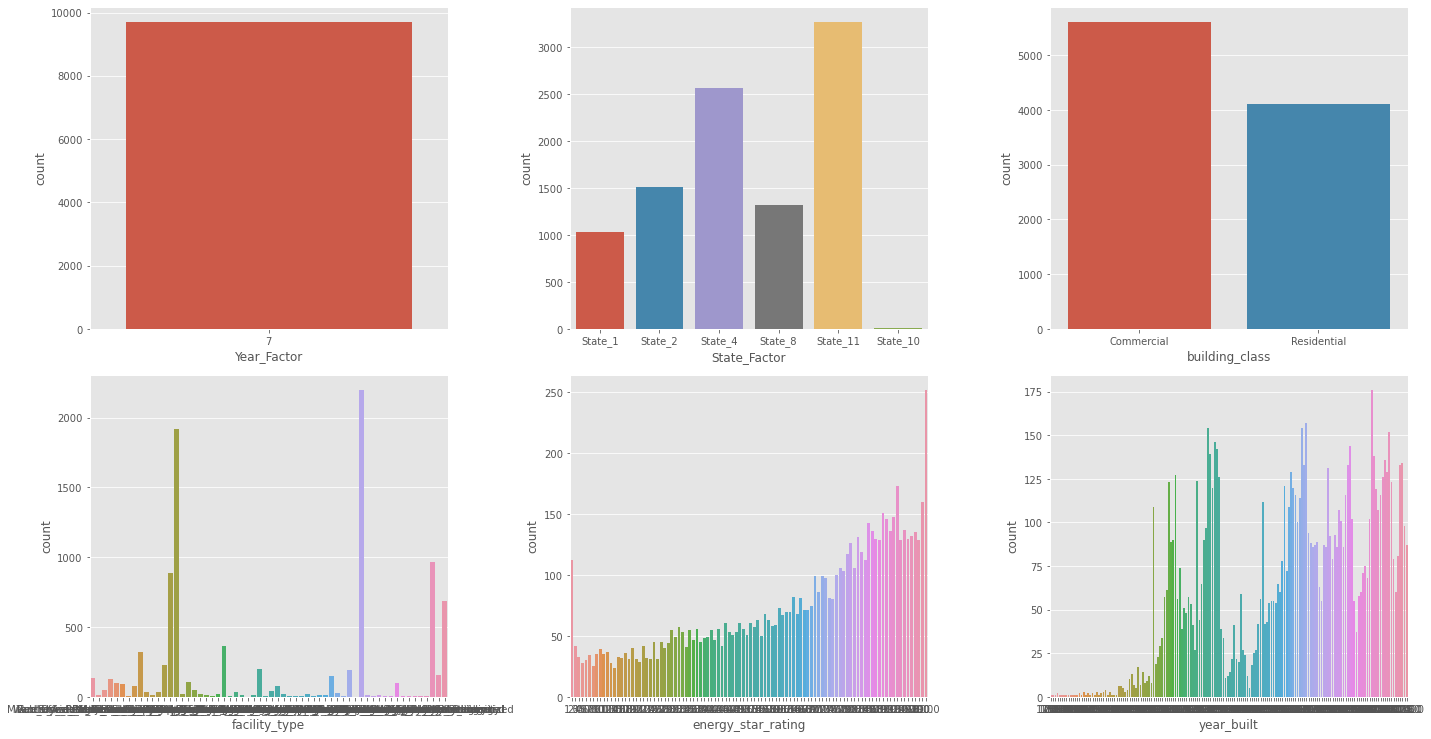

In [13]:
# Looking at the distributions of all discrete variables in test dataset
plt.figure(figsize=(20,15))
discrete = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'energy_star_rating', 'year_built']
a = 1
for i in range(len(discrete)):
    plt.subplot(3, 3, a); 
    sns.countplot(test_df[discrete[i]])
    plt.xlabel(discrete[i])
    a += 1
plt.tight_layout()

Text(0.5, 0, 'site_eui')

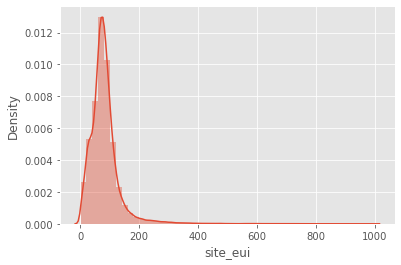

In [14]:
# Distribution of target variable
sns.distplot(train_df["site_eui"])
plt.xlabel("site_eui")

In [15]:
# Features having missing values in train data
train_df_na = pd.DataFrame(train_df.isna().sum())
train_df_na["total"] = train_df.shape[0]
train_df_na["perc_missing"] = round((train_df_na[0]/train_df_na["total"])*100,2)
train_df_na[train_df_na.iloc[:,0]>0]

,0,total,perc_missing
year_built,1837,75757,2.42
energy_star_rating,26709,75757,35.26
direction_max_wind_speed,41082,75757,54.23
direction_peak_wind_speed,41811,75757,55.19
max_wind_speed,41082,75757,54.23
days_with_fog,45796,75757,60.45


In [16]:
# Features having missing values in test data
test_df_na = pd.DataFrame(test_df.isna().sum())
test_df_na["total"] = test_df.shape[0]
test_df_na["perc_missing"] = round((test_df_na[0]/test_df_na["total"])*100,2)
test_df_na[test_df_na.iloc[:,0]>0]

,0,total,perc_missing
year_built,92,9705,0.95
energy_star_rating,2254,9705,23.23
direction_max_wind_speed,8575,9705,88.36
direction_peak_wind_speed,8575,9705,88.36
max_wind_speed,8575,9705,88.36
days_with_fog,9117,9705,93.94


### Dealing with Missing Values

In [17]:
# Removing the 4 features above, since > 80% missing in test data
# removing days_above_110F since has only 0's as values
var_remove = ["direction_max_wind_speed", "direction_peak_wind_speed", "max_wind_speed", "days_with_fog", "days_above_110F"]
train_df = train_df.drop(columns=var_remove, axis=1)
test_df = test_df.drop(columns=var_remove, axis=1)
train_df.shape, test_df.shape

((75757, 59), (9705, 58))

In [18]:
train_df.energy_star_rating.value_counts(), test_df.energy_star_rating.value_counts(), \
test_df.energy_star_rating.min()

(100.0    1946
 1.0       985
 79.0      782
 84.0      781
 89.0      781
          ... 
 21.0      252
 16.0      248
 11.0      247
 10.0      237
 0.0         1
 Name: energy_star_rating, Length: 101, dtype: int64,
 100.0    252
 92.0     173
 99.0     160
 88.0     151
 91.0     148
         ... 
 20.0      29
 12.0      28
 4.0       28
 7.0       25
 13.0      24
 Name: energy_star_rating, Length: 100, dtype: int64,
 1.0)

In [19]:
# year_built: replace with 2000, which is the mode year in test dataset.
train_df['year_built'] =train_df['year_built'].replace(np.nan, 2000)
#replacing energy_star_rating missing values with median
train_df['energy_star_rating']=train_df['energy_star_rating'].replace(np.nan,train_df['energy_star_rating'].median())

# Replicating the above steps for test dataset
test_df['year_built'] =test_df['year_built'].replace(np.nan, 2000)
test_df['energy_star_rating']=test_df['energy_star_rating'].replace(np.nan,train_df['energy_star_rating'].median())

train_df.shape, test_df.shape

((75757, 59), (9705, 58))

Text(0.5, 1.0, 'Train')

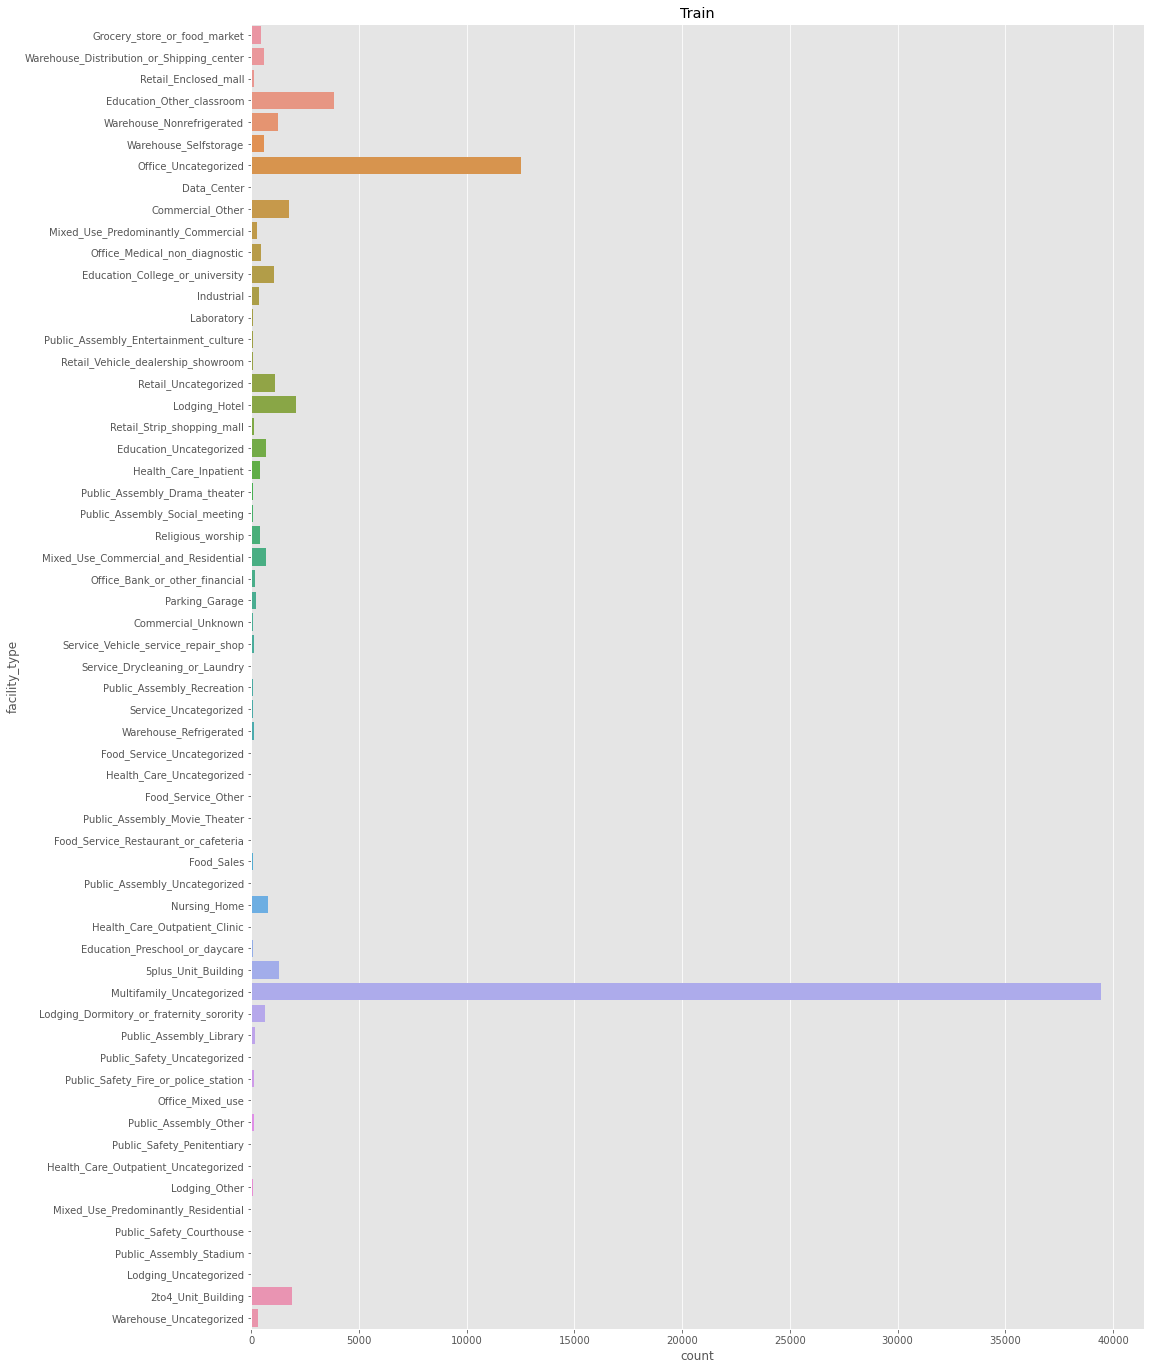

In [20]:
# Looking at the distribution of facility type variable in train dataset
plt.figure(figsize=(16,24))

sns.countplot(y="facility_type",data=train_df)
plt.title('Train')

Text(0.5, 1.0, 'Test')

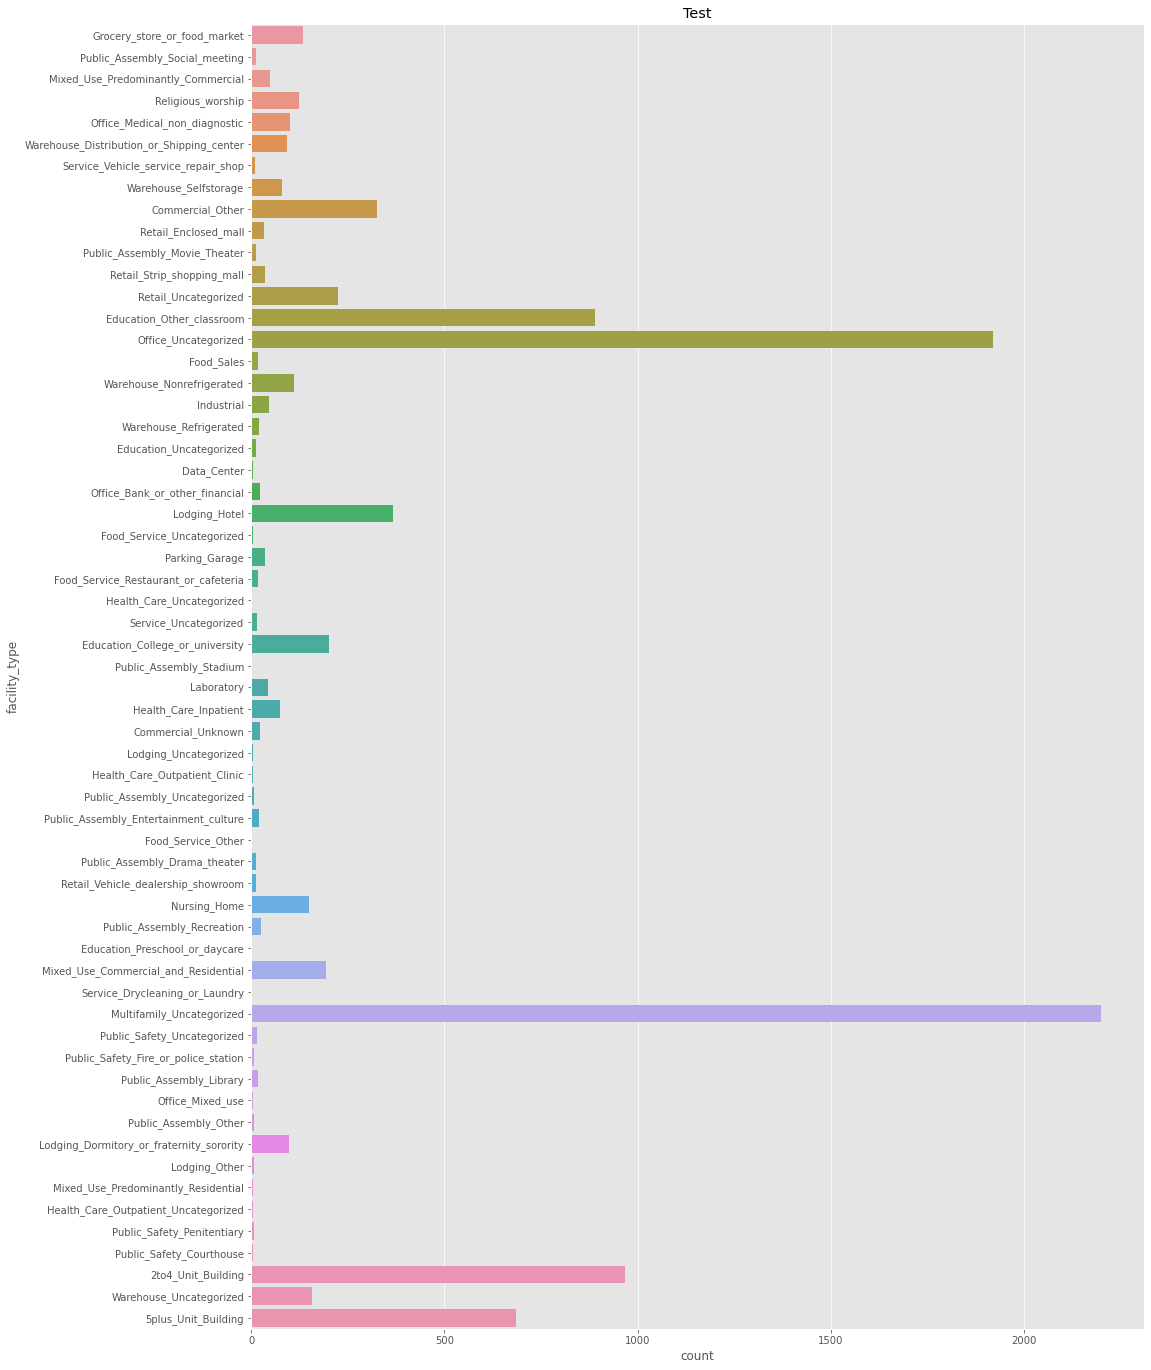

In [21]:
# Looking at the distribution of facility type variable in test dataset
plt.figure(figsize=(16,24))

sns.countplot(y="facility_type",data=test_df)
plt.title('Test')

### Feature Preprocessing

In [22]:
num_features = train_df.select_dtypes(include=['float64']).columns.values

# Compute correlations between all numerical features

train_corr = train_df[num_features].corr()

In [23]:
# Sort features by their (absolute) correlation with the target variable.
# Here we see that "energy_star_rating" is highly correlated with site_eui (our target), so it might be a good predictor.

train_corr.sort_values(by='site_eui', key=abs, ascending=False)['site_eui']

site_eui                1.000000
energy_star_rating     -0.371615
january_avg_temp       -0.167982
snowfall_inches         0.157284
february_avg_temp      -0.154071
march_avg_temp         -0.135303
july_avg_temp           0.133856
june_avg_temp           0.122019
august_avg_temp         0.113786
precipitation_inches    0.113558
april_avg_temp         -0.113008
september_avg_temp      0.108853
avg_temp               -0.089201
floor_area              0.073967
may_avg_temp            0.072271
november_avg_temp      -0.069882
december_avg_temp      -0.050328
october_avg_temp       -0.040162
year_built              0.012875
ELEVATION               0.011798
Name: site_eui, dtype: float64

<AxesSubplot:>

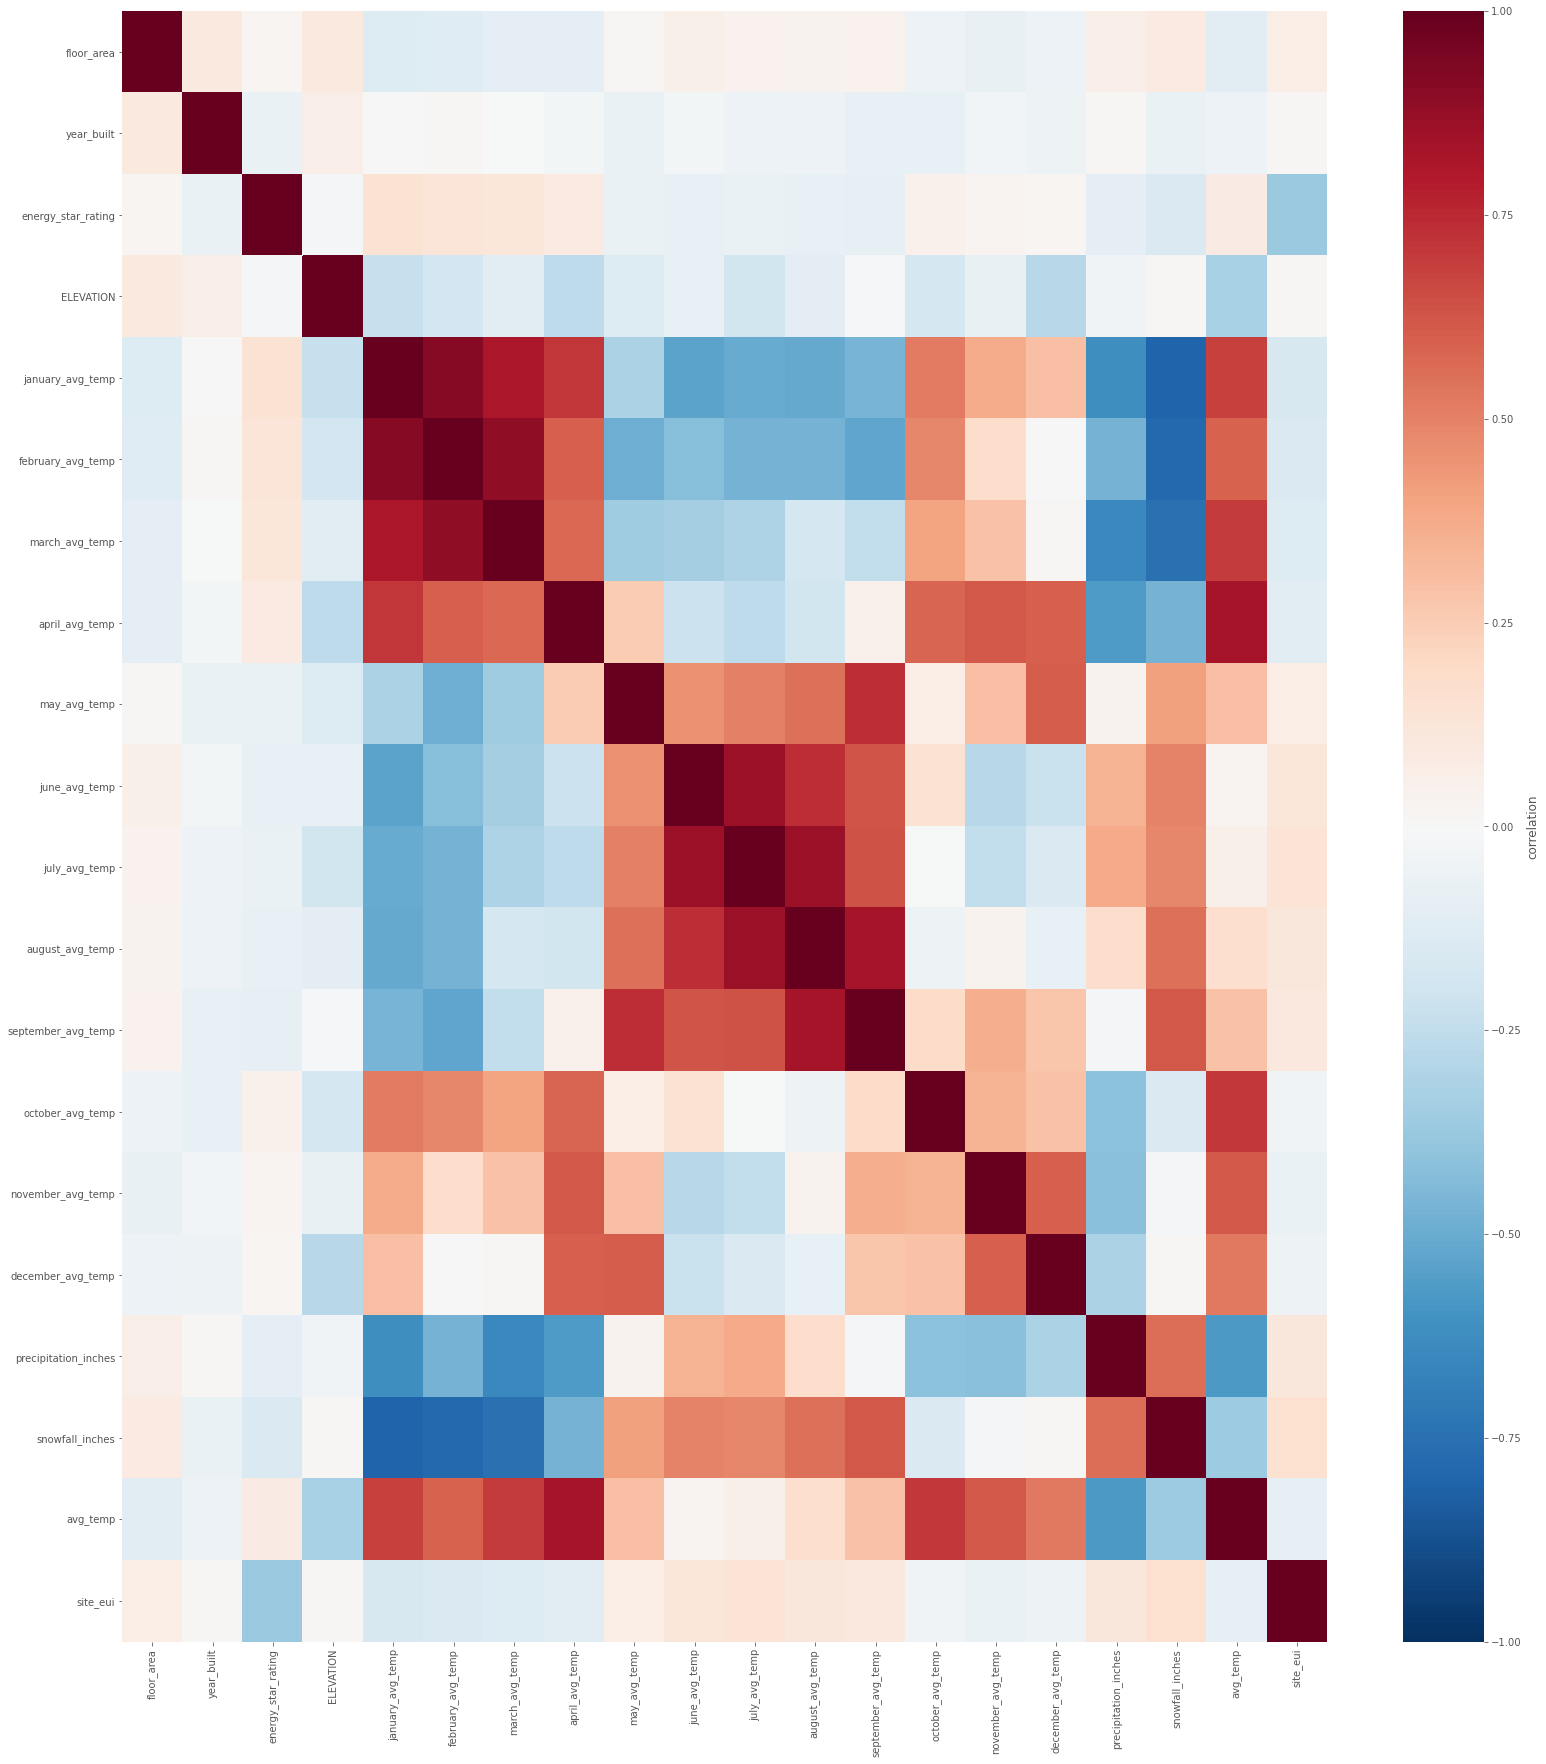

In [24]:
# Plot correlations as a heatmap
# This could indicate that we can drop some of these features.

fig, ax = plt.subplots(figsize=(27, 30))
sns.heatmap(train_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', xticklabels=True, yticklabels=True, cbar_kws={'label' : 'correlation'}, ax=ax)

In [25]:
# We see that jan_feb_mar_apr temp are similar, may_june_jul_aug_sep, nov_dec
# train_df['jan_to_apr_avg_temp'] = train_df[['january_avg_temp','february_avg_temp','march_avg_temp']].mean(axis = 1)
# train_df['may_to_sep_avg_temp'] = train_df[['may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp',\
#                                             'september_avg_temp']].mean(axis = 1)
# train_df['nov_dec_avg_temp'] = train_df[['november_avg_temp','december_avg_temp']].mean(axis = 1)

# test_df['jan_to_apr_avg_temp'] = test_df[['january_avg_temp','february_avg_temp','march_avg_temp']].mean(axis = 1)
# test_df['may_to_sep_avg_temp'] = test_df[['may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp',\
#                                             'september_avg_temp']].mean(axis = 1)
# test_df['nov_dec_avg_temp'] = test_df[['november_avg_temp','december_avg_temp']].mean(axis = 1)

train_df.shape, test_df.shape

((75757, 59), (9705, 58))

In [26]:
# Label Encoding State_Factor, building_class, and facility_type
le = LabelEncoder()

train_df['State_Factor_le']= le.fit_transform(train_df['State_Factor']).astype("uint8")
test_df['State_Factor_le']= le.fit_transform(test_df['State_Factor']).astype("uint8")

train_df['building_class_le']= le.fit_transform(train_df['building_class']).astype("uint8")
test_df['building_class_le']= le.fit_transform(test_df['building_class']).astype("uint8")

train_df['facility_type_le']= le.fit_transform(train_df['facility_type']).astype("uint8")
test_df['facility_type_le']= le.fit_transform(test_df['facility_type']).astype("uint8")
train_df.shape, test_df.shape

((75757, 62), (9705, 61))

In [27]:
# Looking at average site_eui across state_factor values in train dataset
a = train_df.groupby("State_Factor").agg({'site_eui': 'mean', 'id': 'count'}).reset_index()
a["perc_count"] = (a["id"]/train_df.shape[0])*100
a

,State_Factor,site_eui,id,perc_count
0,State_1,62.196194,5618,7.415816
1,State_10,68.597082,15,0.019800
2,State_11,53.989234,6412,8.463904
3,State_2,77.873978,4871,6.429769
4,State_4,95.199291,4300,5.676043
5,State_6,87.481012,50840,67.109310
6,State_8,87.416018,3701,4.885357


In [28]:
# Looking at average site_eui across state_factor values in test dataset
b = test_df.groupby("State_Factor").agg({'id': 'count'}).reset_index()
b["perc_count"] = (b["id"]/test_df.shape[0])*100
b

# Binning State_Factor using the frequency and average site_eui distributions across train and test, with the below bins:
# State_Factors 1 and 10
# State_Factor 11
# State_Factors 6, 4, and 8
# State_Factor 2

,State_Factor,id,perc_count
0,State_1,1027,10.582174
1,State_10,4,0.041216
2,State_11,3268,33.673364
3,State_2,1515,15.610510
4,State_4,2568,26.460587
5,State_8,1323,13.632148


In [29]:
# Binning State_Factor based on above logic
train_df["State_Factor_bin"] = train_df["State_Factor"].apply(lambda x: "State_1_10" if x in ["State_1","State_10"]\
                                                              else "State_11" if x in ["State_11"] else "State_6_4_8"
                                                              if x in ["State_6", "State_4", "State_8"] else "State_Others")

test_df["State_Factor_bin"] = test_df["State_Factor"].apply(lambda x: "State_1_10" if x in ["State_1","State_10"]\
                                                              else "State_11" if x in ["State_11"] else "State_6_4_8"
                                                              if x in ["State_6", "State_4", "State_8"] else "State_Others")

In [30]:
# Looking at the distribution across the State_Factor bins created in train
train_df["State_Factor_bin"].value_counts()/train_df.shape[0]

State_6_4_8     0.776707
State_11        0.084639
State_1_10      0.074356
State_Others    0.064298
Name: State_Factor_bin, dtype: float64

In [31]:
# Looking at the distribution across the State_Factor bins created in test
test_df["State_Factor_bin"].value_counts()/test_df.shape[0]

State_6_4_8     0.400927
State_11        0.336734
State_Others    0.156105
State_1_10      0.106234
Name: State_Factor_bin, dtype: float64

In [32]:
# Label Encoding the binned state_factor variable in train and test

train_df["State_Factor_bin_le"] = le.fit_transform(train_df["State_Factor_bin"]).astype("uint8")
test_df["State_Factor_bin_le"] = le.fit_transform(test_df["State_Factor_bin"]).astype("uint8")

In [33]:
# Dropping State_Factor_bin and State_Factor label encoded

train_df = train_df.drop(columns=['State_Factor_bin','State_Factor_le'], axis=1)
test_df = test_df.drop(columns=['State_Factor_bin','State_Factor_le'], axis=1)
train_df.shape, test_df.shape

((75757, 62), (9705, 61))

In [34]:
# Creating time_since_built for better interpretation of the variable
from datetime import date

train_df["time_since_built"] = date.today().year - train_df["year_built"]
test_df["time_since_built"] = date.today().year - test_df["year_built"]

In [35]:
train_df[["year_built", "time_since_built"]]
train_df.shape, test_df.shape

((75757, 63), (9705, 62))

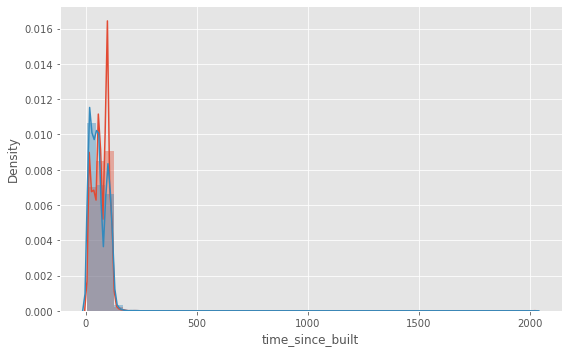

In [36]:
# Plotting the distribution of time_since_built in train and test
plt.figure(figsize=(8,5))

sns.distplot(train_df["time_since_built"])
sns.distplot(test_df["time_since_built"])        
plt.xlabel("time_since_built")

plt.tight_layout()

In [37]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [38]:
num_features = train_df.select_dtypes(include=['float64']).columns.values

<AxesSubplot:>

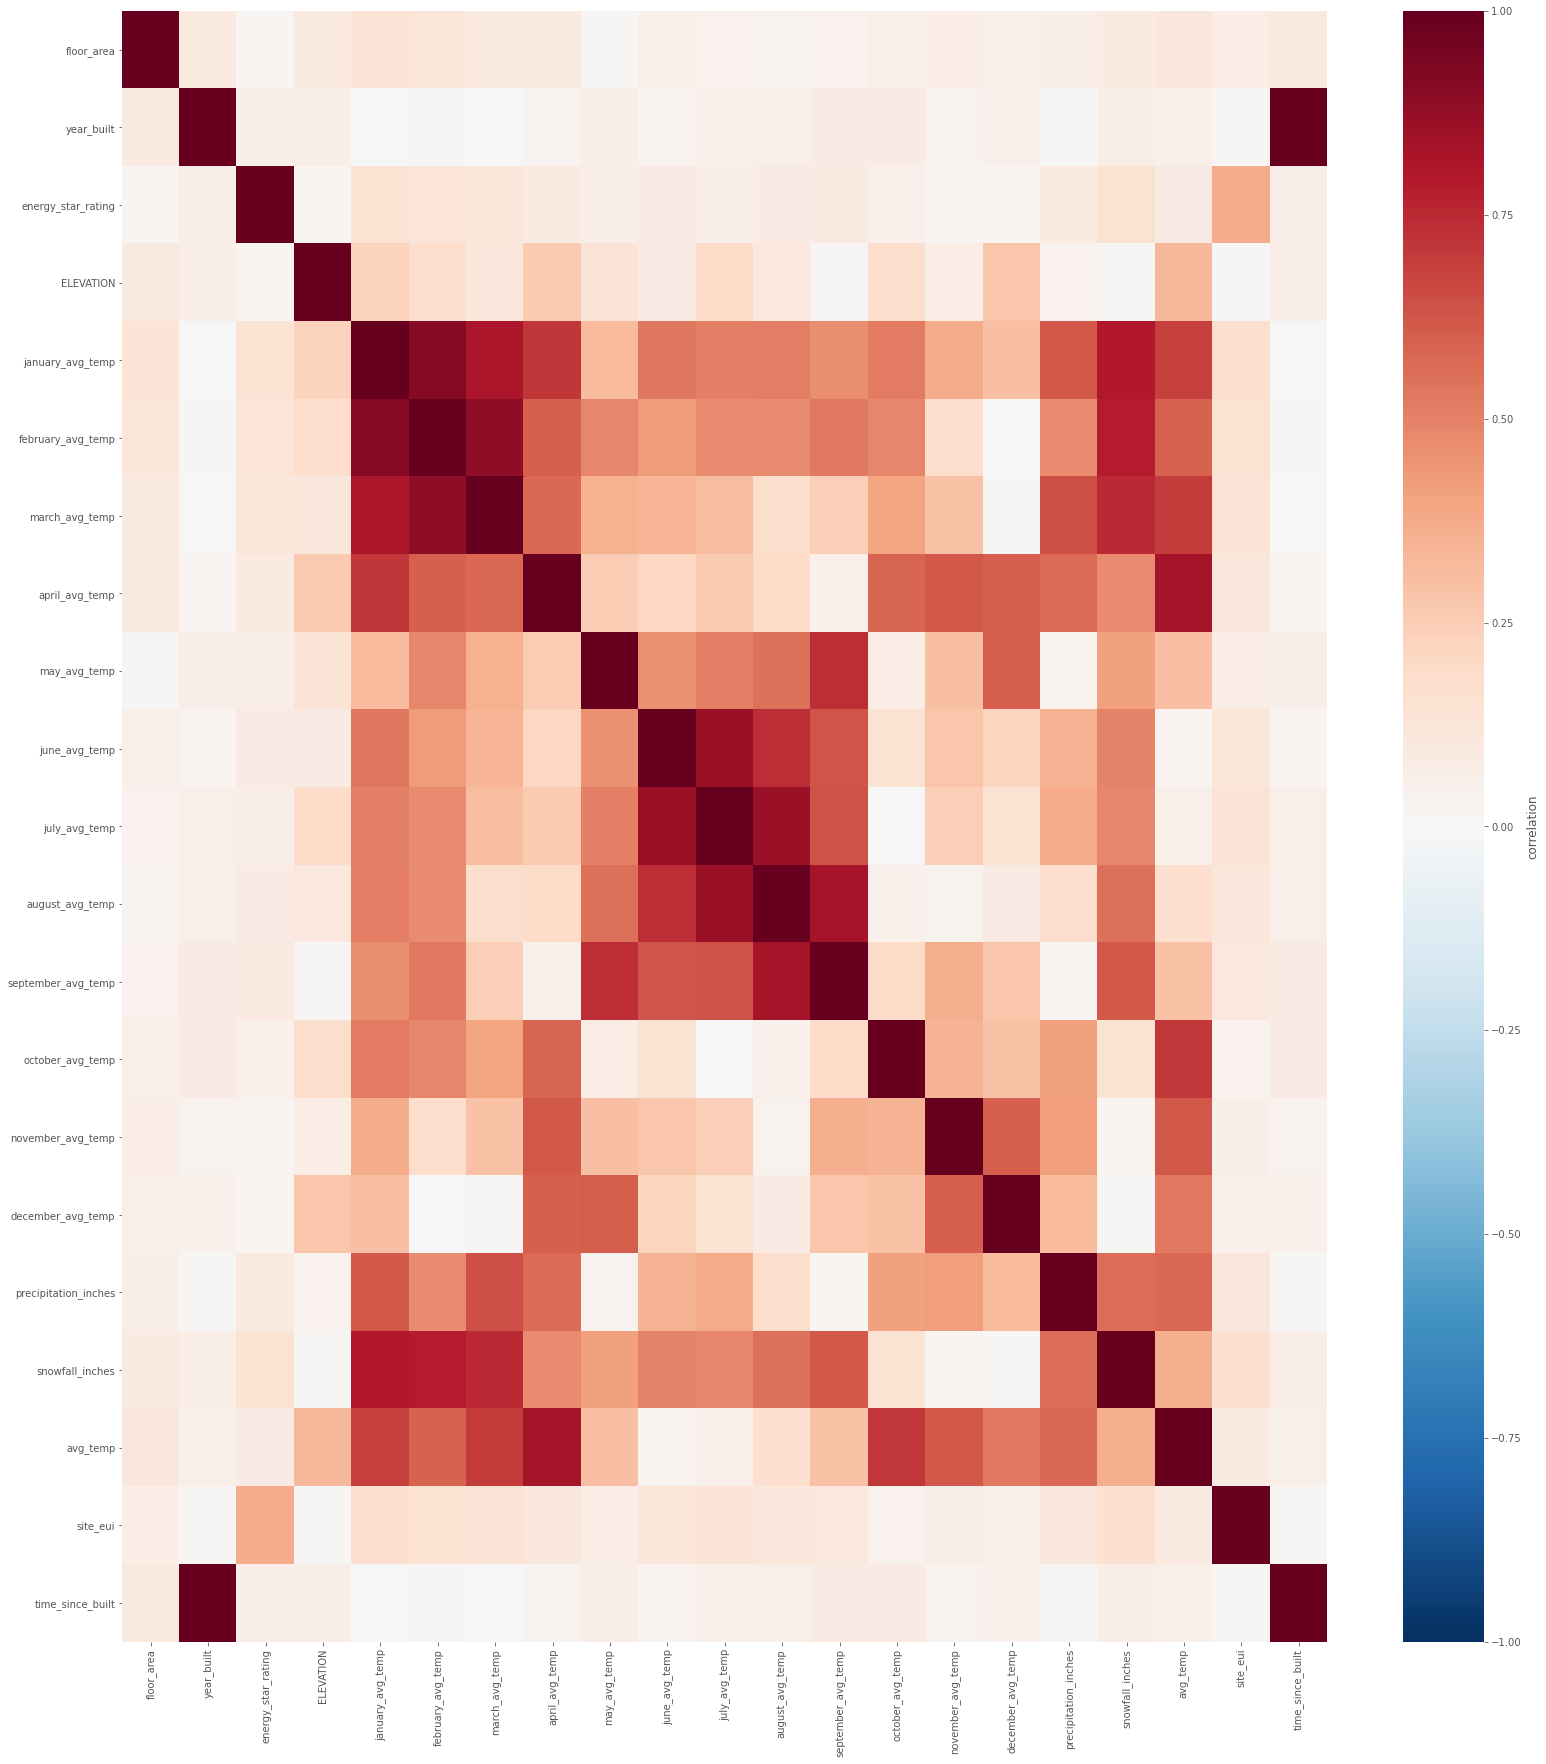

In [39]:
# Correlation
corr = train_df[num_features].corr().abs()

# plot the correlation heatmap

fig, ax = plt.subplots(figsize=(27, 30))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'RdBu_r', xticklabels=True, yticklabels=True, cbar_kws={'label' : 'correlation'}, ax=ax)

In [40]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,june_avg_temp,...,august_avg_temp,september_avg_temp,october_avg_temp,november_avg_temp,december_avg_temp,precipitation_inches,snowfall_inches,avg_temp,site_eui,time_since_built
floor_area,NaN,0.096106,0.020902,0.097797,0.137654,0.120068,0.098905,0.100034,0.011626,0.056028,...,0.038335,0.046048,0.059559,0.071890,0.059289,0.062634,0.092503,0.111303,0.073967,0.096106
year_built,NaN,NaN,0.063225,0.064068,0.001691,0.009895,0.001507,0.028334,0.062664,0.030281,...,0.056408,0.083168,0.081687,0.036953,0.050373,0.015243,0.070187,0.062390,0.012875,1.000000
energy_star_rating,NaN,NaN,NaN,0.018482,0.142414,0.131229,0.121307,0.090884,0.062790,0.083513,...,0.084808,0.091906,0.049984,0.024529,0.016240,0.094008,0.140896,0.078164,0.371615,0.063225
ELEVATION,NaN,NaN,NaN,NaN,0.233452,0.184543,0.112014,0.258460,0.133906,0.080968,...,0.106940,0.014956,0.179472,0.074790,0.276819,0.043577,0.009727,0.326495,0.011798,0.064068
january_avg_temp,NaN,NaN,NaN,NaN,NaN,0.911228,0.818900,0.717394,0.314896,0.538737,...,0.510845,0.464724,0.519878,0.368320,0.304532,0.621668,0.799105,0.684073,0.167982,0.001691
february_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,0.887516,0.601393,0.486830,0.422197,...,0.473342,0.524422,0.485194,0.184894,0.006944,0.474375,0.785954,0.593575,0.154071,0.009895
march_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.570915,0.355076,0.343096,...,0.172550,0.243062,0.404877,0.295780,0.014031,0.641597,0.749994,0.697756,0.135303,0.001507
april_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257073,0.212386,...,0.187585,0.053603,0.581474,0.618561,0.597164,0.565594,0.471540,0.835076,0.113008,0.028334
may_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459987,...,0.551269,0.737182,0.076152,0.299647,0.606493,0.035471,0.412282,0.300828,0.072271,0.062664
june_avg_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.736974,0.628153,0.143774,0.275379,0.225949,0.345950,0.493330,0.024295,0.122019,0.030281


In [41]:
# Sort features by their (absolute) correlation with the target variable.

corr.sort_values(by='site_eui', key=abs, ascending=False)['site_eui']

site_eui                1.000000
energy_star_rating      0.371615
january_avg_temp        0.167982
snowfall_inches         0.157284
february_avg_temp       0.154071
march_avg_temp          0.135303
july_avg_temp           0.133856
june_avg_temp           0.122019
august_avg_temp         0.113786
precipitation_inches    0.113558
april_avg_temp          0.113008
september_avg_temp      0.108853
avg_temp                0.089201
floor_area              0.073967
may_avg_temp            0.072271
november_avg_temp       0.069882
december_avg_temp       0.050328
october_avg_temp        0.040162
time_since_built        0.012875
year_built              0.012875
ELEVATION               0.011798
Name: site_eui, dtype: float64

In [42]:
# Looking at Features having >80% correlation with any other feature
[column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

['february_avg_temp',
 'march_avg_temp',
 'july_avg_temp',
 'august_avg_temp',
 'september_avg_temp',
 'avg_temp',
 'time_since_built']

In [43]:
# Dropping features with >80% correlation 
to_drop = ['february_avg_temp','march_avg_temp','july_avg_temp',"august_avg_temp","september_avg_temp","avg_temp","year_built"]

In [44]:
train_df_new = train_df.drop(columns=train_df[to_drop], axis=1)
test_df_new = test_df.drop(columns=train_df[to_drop], axis=1)

train_df.shape, test_df.shape

((75757, 63), (9705, 62))

In [45]:
train_df_new.shape, test_df_new.shape

((75757, 56), (9705, 55))

In [46]:
train_df_new.select_dtypes(include=["object"])

,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated
...,...,...,...
75752,State_11,Commercial,Office_Uncategorized
75753,State_11,Residential,5plus_Unit_Building
75754,State_11,Commercial,Commercial_Other
75755,State_11,Commercial,Commercial_Other


In [47]:
test_df_new.select_dtypes(include=["object"])

,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Grocery_store_or_food_market
2,State_1,Commercial,Grocery_store_or_food_market
3,State_1,Commercial,Grocery_store_or_food_market
4,State_1,Commercial,Grocery_store_or_food_market
...,...,...,...
9700,State_11,Residential,5plus_Unit_Building
9701,State_11,Residential,5plus_Unit_Building
9702,State_11,Residential,5plus_Unit_Building
9703,State_11,Residential,5plus_Unit_Building


### Feature Scaling

In [48]:
# Splitting train Data into train and validation
train_dta, val_dta = train_test_split(train_df_new, test_size = 0.3)
train_dta.shape, val_dta.shape

((53029, 56), (22728, 56))

In [49]:
# Segmenting data into two segments based on state_factor
train_df_new_sf2 = train_df_new[train_df_new["State_Factor_bin_le"] == 2]
train_df_new_sfrest = train_df_new[train_df_new["State_Factor_bin_le"] != 2]

test_df_new_sf2 = test_df_new[test_df_new["State_Factor_bin_le"] == 2]
test_df_new_sfrest = test_df_new[test_df_new["State_Factor_bin_le"] != 2]
train_df_new_sf2.shape, train_df_new_sfrest.shape, test_df_new_sf2.shape, test_df_new_sfrest.shape

# Dropping columns not required in training
train_df_new_sf2 = train_df_new_sf2.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)
train_df_new_sfrest = train_df_new_sfrest.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)

train_df_new_sf2.shape, train_df_new_sfrest.shape, test_df_new_sf2.shape, test_df_new_sfrest.shape

((58841, 51), (16916, 51), (3891, 55), (5814, 55))

In [50]:
# train_dta, val_dta = train_df_new[train_df_new["Year_Factor"] < 6], train_df_new[train_df_new["Year_Factor"] == 6]
# Dropping columns not required in training
train_df_new.select_dtypes(include=["object"])

train_dta = train_dta.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)
val_dta = val_dta.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)
test_df_new = test_df_new.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)

In [51]:
test_df_new.shape, train_dta.shape, val_dta.shape

((9705, 50), (53029, 51), (22728, 51))

In [52]:
# Creating X and y for train and validation
train_target = train_dta["site_eui"]
val_target = val_dta["site_eui"]

train_dta = train_dta.drop(columns=["site_eui"], axis=1)
val_dta = val_dta.drop(columns=["site_eui"], axis=1)

In [53]:
train_full = train_dta.append(val_dta).reset_index()
target_full = train_target.append(val_target).reset_index()

In [54]:
# Creating X and y for train and validation for segmented data
train_target_sf2 = train_df_new_sf2["site_eui"]
train_target_sfrest = train_df_new_sfrest["site_eui"]

train_dta_sf2 = train_df_new_sf2.drop(columns=["site_eui"], axis=1)
train_dta_sfrest = train_df_new_sfrest.drop(columns=["site_eui"], axis=1)

## Models

In [55]:
from catboost import CatBoostRegressor

### CatBoost

In [56]:
import catboost as cb
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

RANDOM_STATE = 42

# function returning the average rmse for cross validated test folds
def cross_val(X, y, X_test, param, n_splits=3, n_repeats=3):
    import catboost as cb
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=RANDOM_STATE)
    
    rmse = []
    
    for tr_ind, val_ind in rkf.split(X, y):
        X_train = X.iloc[tr_ind]
        X_train = X_train.drop(columns=["index"], axis=1)
        y_train = y.iloc[tr_ind]
        y_train = y_train.drop(columns=["index"], axis=1)
        
        X_valid = X.iloc[val_ind]
        X_valid = X_valid.drop(columns=["index"], axis=1)
        y_valid = y.iloc[val_ind]
        y_valid = y_valid.drop(columns=["index"], axis=1)
        
        catb = cb.CatBoostRegressor(iterations=param['iterations'],
                                depth=param['depth'],
                                l2_leaf_reg = param['l2_leaf_reg'],
                                learning_rate = param['learning_rate'],
                                loss_function = 'RMSE')
                                                 
        catb.fit(X_train, y_train, eval_set=(X_valid, y_valid))
        
        y_pred = catb.predict(X_valid)
        root_mse = np.sqrt(mean_squared_error(y_valid, y_pred))
        rmse.append(root_mse)
    return np.mean(rmse)

In [57]:
# function conducting a gridsearch along with cross validation and returning the best params giving lowest rmse
def catboost_GridSearchCV(X, y, X_test, params, n_splits=3, n_repeats=3):
    ps = {'rmse':100,
          'param': []
    }
    
    
    for prms in tqdm(list(ParameterGrid(params)), ascii=True, desc='Params Tuning:'):
                          
        rmse = cross_val(X, y, X_test, prms, n_splits=n_splits, n_repeats=n_repeats)

        if rmse<ps['rmse']:
            ps['rmse'] = rmse
            ps['param'] = prms
    print('RMSE: '+str(ps['rmse']))
    print('Params: '+str(ps['param']))
    
    return ps['param']

In [69]:
# Declaring the parameters over which grid search will be done
params = {'depth': [4, 7, 10, 12],
          'learning_rate' : [0.03, 0.1, 0.15],
          'l2_leaf_reg': [1,4,9],
          'iterations': [100, 200, 500],
          'early_stopping_rounds': [9],
          'random_seed': [417]}

param = catboost_GridSearchCV(train_full, target_full, test_df_new, params, n_splits=3, n_repeats=3)

cb = cb.CatBoostRegressor()
cb.grid_search(params, train_dta, y=train_target)

In [70]:
param # best parameters

In [58]:
train_full = train_full.drop(columns=["index"], axis=1)
target_full = target_full.drop(columns=["index"], axis=1)

In [59]:
# Fitting the model with the best params from gridsearch with CV
catb_hpo = CatBoostRegressor(
    verbose=1000,
    early_stopping_rounds=9,
    random_seed=417,
    depth=10,
    learning_rate=0.15,
    iterations=500,
    l2_leaf_reg=1,
    loss_function='RMSE'
    )

catb_hpo.fit(train_full, target_full) # fitting the model on full train dataset (since did cross validation, did not split train data into train and validation)
catb_hpo.fit(train_dta_sfrest, train_target_sfrest) # fitting the model on segmented data with state_factor not in 6,4,8

0:	learn: 55.5022844	total: 95.8ms	remaining: 47.8s
499:	learn: 28.3108087	total: 16.5s	remaining: 0us
0:	learn: 56.3990312	total: 18.9ms	remaining: 9.45s
499:	learn: 14.6473892	total: 8.29s	remaining: 0us


In [74]:
# Grid Search with CV for RF for the other segment (State_factor in 6,4,8)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 1000]
}
# Create a base model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_dta_sf2, train_target_sf2)
rf = RandomForestRegressor(criterion='mse',max_depth = 10, random_state=417)
rf.fit(train_dta_sf2, train_target_sf2)

In [ ]:
grid_search.best_params_ # best params from grid search

In [60]:
# Fitting RF on the other segment with the best params from GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_best = RandomForestRegressor(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100)
rf_best.fit(train_dta_sf2, train_target_sf2)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=12)

In [61]:
# print("Train Mean Absolute Error: ", mean_absolute_error(train_target, catb.predict(train))) # 25.498
# print("Train Mean Square Error: ", mean_squared_error(train_target, catb.predict(train))) # 2149.902
# print("Train RMSE: ", np.sqrt(mean_squared_error(train_target, catb.predict(train)))) # 46.367

# print("Val Mean Absolute Error: ", mean_absolute_error(val_target, catb_predict)) # 25.498
# print("Val Mean Square Error: ", mean_squared_error(val_target, catb_predict)) # 2149.902
# print("Val RMSE: ", np.sqrt(mean_squared_error(val_target, catb_predict))) # 46.367
# print("RMSE HPO1: ", np.sqrt(mean_squared_error(target_full, catb_hpo.predict(train_full)))) # 28.322
# print("RMSE HPO2: ", np.sqrt(mean_squared_error(target_full, catb_hpo.predict(train_full)))) # 28.23
print("RMSE HPO SFREST: ", np.sqrt(mean_squared_error(train_target_sfrest, catb_hpo.predict(train_dta_sfrest)))) # 14.64
print("RMSE HPO SF2: ", np.sqrt(mean_squared_error(train_target_sf2, rf_best.predict(train_dta_sf2)))) # 40.6

RMSE HPO SFREST:  14.647389212804288
RMSE HPO SF2:  40.40190161069708


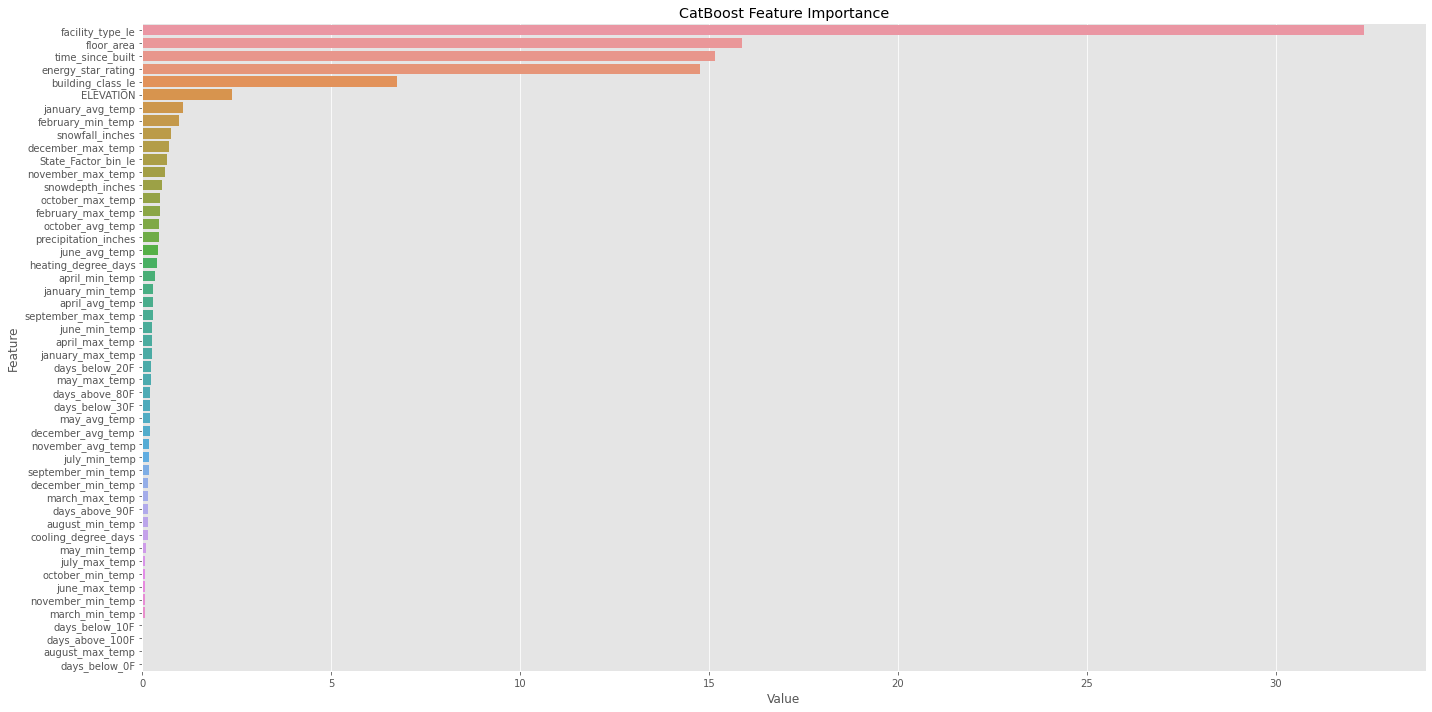

<Figure size 432x288 with 0 Axes>

In [62]:
# Feature importance in the catboost regression
feature_imp = pd.DataFrame(sorted(zip(catb_hpo.feature_importances_, train_full.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost Feature Importance')
plt.tight_layout()
plt.show()
plt.savefig('catb_importances-01.png')

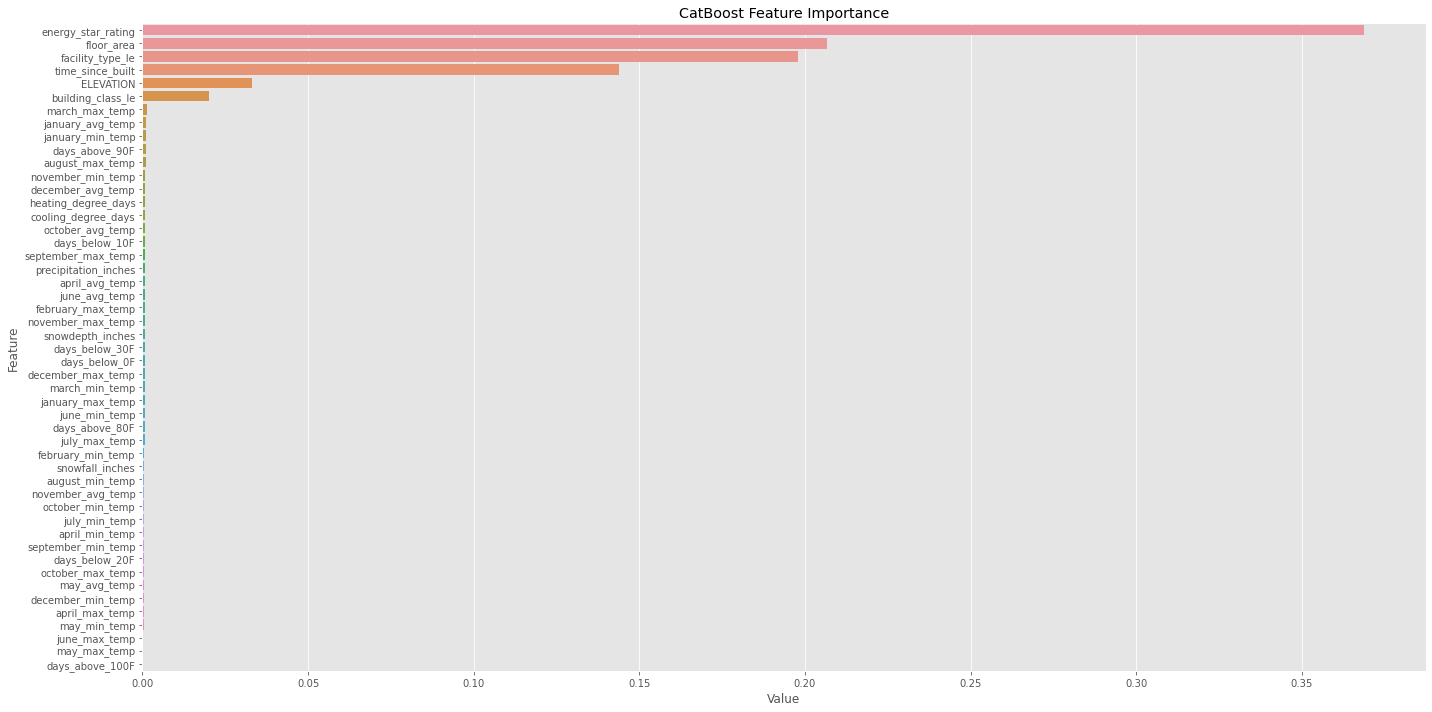

<Figure size 432x288 with 0 Axes>

In [63]:
# Feature importance in the RF regression
feature_imp = pd.DataFrame(sorted(zip(rf_best.feature_importances_, train_full.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost Feature Importance')
plt.tight_layout()
plt.show()
plt.savefig('catb_importances-01.png')

### Kaggle Test Prediction & Submission

In [64]:
# test_df_x = test_df[x_train.columns]
# test_df_final = pd.read_csv("../input/widsdatathon2022/test.csv")
test_df_final = pd.read_csv("../data/test.csv")
test_df_final.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [65]:
# Dropping unnecessary columns
test_df_new_sf2_v2 = test_df_new_sf2.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)
test_df_new_sfrest_v2 = test_df_new_sfrest.drop(columns=["Year_Factor","id", "facility_type","State_Factor","building_class"], axis=1)

# Predicting site_eui for both the segments
predict_sub_sfrest = catb_hpo.predict(test_df_new_sfrest_v2)
predict_sub_sf2 = rf_best.predict(test_df_new_sf2_v2)

In [66]:
# train_dta_sf2.columns, test_df_new_sf2_v2.columns

In [67]:
test_df_new_sfrest["pred"] = predict_sub_sfrest
test_df_new_sf2["pred"] = predict_sub_sf2
# test_df_new_sfrest.head(), test_df_new_sf2.head()

In [68]:
# Merging the predictions with the full test data using id, year_factor, state_factor as keys
test_df_final_pred1=test_df_final.merge(test_df_new_sfrest, on=["id","Year_Factor","State_Factor"], how='left')
test_df_final_pred2=test_df_final_pred1.merge(test_df_new_sf2, on=["id","Year_Factor","State_Factor"], how='left')

In [69]:
# Creating final pred column taking the prediction of the respective model
test_df_final_pred2['pred'] = np.where(test_df_final_pred2.pred_x.isna(),test_df_final_pred2.pred_y,test_df_final_pred2.pred_x)

In [70]:
# Final prediction
predict_sub = test_df_final_pred2['pred']

In [71]:
# sample_sol = pd.read_csv("../input/widsdatathon2022/sample_solution.csv")
sample_sol = pd.read_csv("../data/sample_solution.csv")

In [72]:
len(predict_sub), len(sample_sol.site_eui)

(9705, 9705)

In [73]:
sample_sol.site_eui = predict_sub

In [74]:
sample_sol.to_csv("submission_catb_vritti_eco_wochigo_hpo.csv", index=False)